In [24]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import astropy.units as u
import astropy.constants as c
from astropy.cosmology import Planck18 as cosmo

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.utils import load_h5_dict

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file("../matplotlibrc")

# ranges 250428

In [ ]:
# conformal matter density [M_sun / cMpc^3]
RHO_M = cosmo.Om0 * cosmo.critical_density0.to(u.M_sun / u.Mpc**3).value
M_MIN = 1 # [M_sun]
M_MAX = RHO_M * (4/3) * np.pi * 512**3 # [M_sun]

m_s = np.geomspace(M_MIN, M_MAX, 4001)
z_s = np.geomspace(4, 100, 300)
d_s = np.linspace(-1, 1.6, 300)
zfull_s = np.concatenate((z_s, np.geomspace(z_s[-1], 3000, 300)[1:])) # for Unconditional PS and ST tables
cinf_s = np.geomspace(
    np.sqrt(5/3 * (1+0.) * 10  * u.K * c.k_B / c.m_p).to(u.km/u.s).value, # 0.371 km/s
    np.sqrt(5/3 * (1+1.) * 1e4 * u.K * c.k_B / c.m_p).to(u.km/u.s).value, # 16.6 km/s
    128
)

In [29]:
hmfdata = load_h5_dict("/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/data/hmf/hmf.h5")
z_s = hmfdata['z'] # [1]    | redshift
d_s = hmfdata['d'] # [1]    | delta (overdensity)
m_s = hmfdata['m'] # [Msun] | halo mass

zfull_s = np.concatenate((z_s, np.geomspace(z_s[-1], 3000, 300)[1:])) # for Unconditional PS and ST tables
cinf_s = np.geomspace(
    np.sqrt(5/3 * (1+0.) * 10  * u.K * c.k_B / c.m_p).to(u.km/u.s).value, # 0.371 km/s
    np.sqrt(5/3 * (1+1.) * 1e4 * u.K * c.k_B / c.m_p).to(u.km/u.s).value, # 16.6 km/s
    128
)

In [31]:
dims = (len(z_s), len(cinf_s), len(d_s))
size = 8 * np.prod(dims) / 1e9 # in GB
print(f"Shape of the table: {dims}")
print(f"Size of the table: {size:.3f} GB")

Shape of the table: (300, 128, 300)
Size of the table: 0.092 GB


# ranges 250606

In [46]:
# conformal matter density [M_sun / cMpc^3]
RHO_M = cosmo.Om0 * cosmo.critical_density0.to(u.M_sun / u.Mpc**3).value
M_MIN = 1 # [M_sun]
M_MAX = RHO_M * (4/3) * np.pi * 512**3 # [M_sun]

m_s = np.geomspace(M_MIN, M_MAX, 4001)
z_s = np.geomspace(4, 100, 300)
dsub_s = np.linspace(-1, 1.6, 64)
zfull_s = np.concatenate((z_s, np.geomspace(z_s[-1], 3000, 300)[1:])) # for Unconditional PS and ST tables
cinf_s = np.geomspace(
    np.sqrt(5/3 * (1+0.) * 1   * u.K * c.k_B / c.m_p).to(u.km/u.s).value, # 0.371 km/s
    np.sqrt(5/3 * (1+1.) * 1e4 * u.K * c.k_B / c.m_p).to(u.km/u.s).value, # 16.6 km/s
    64
)
vcb_s = np.geomspace(0.01, 100, 128) # [km/s]

In [49]:
dims = (len(z_s), len(cinf_s), len(dsub_s), len(vcb_s))
size = 8 * np.prod(dims) / 1e9 # in GB
print(f"Shape of the table: {dims}")
print(f"Size of the table: {size:.3f} GB")

Shape of the table: (300, 64, 64, 128)
Size of the table: 1.258 GB


# smoothness test

In [ ]:
run_name = 'PRc23'
run_subname = f'log10m2.000'
data = load_h5_dict(f"{os.environ['DM21CM_DIR']}/pbhacc_rates/{run_name}/{run_name}_{run_subname}_cosmo.h5")
table = data['ps_cond']
print(table.shape)

(300, 64, 64, 128)


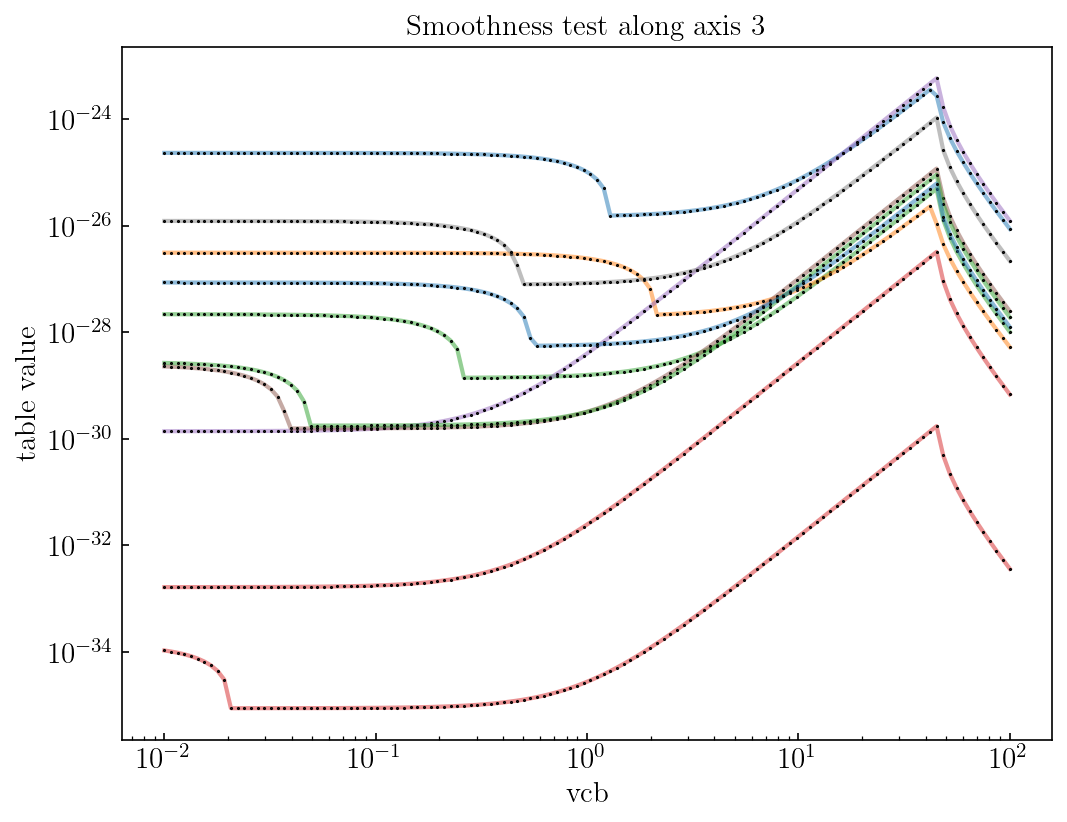

In [48]:
axes = (z_s, cinf_s, dsub_s, vcb_s)
names = ['z', 'cinf', 'dsub', 'vcb']
test_axis = 3
n_test = 10

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_test):
    # Select random indices for the other two axes
    idx_other = [np.random.randint(len(axis)) for j, axis in enumerate(axes) if j != test_axis]
    # Build the slicing tuple
    slc = [slice(None) if j == test_axis else idx_other.pop(0) for j in range(len(axes))]
    # Get the 1D slice and x-axis
    x = axes[test_axis]
    y = table[tuple(slc)]
    ax.plot(x, y, '-', alpha=0.5)
    ax.plot(x, y, 'k.', ms=1)
    ax.loglog()
ax.set(xlabel=names[test_axis], ylabel='table value', title=f'Smoothness test along axis {test_axis}');